# Creating New GitHub Repo with Jupyter Notebook

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import pandas as pd
# code: "from sklearn.model_selection import train_test_split"

In [4]:
df = pd.read_csv('real_estate_db.csv', encoding='latin-1') # imports the CSV into the local notebook.

In [5]:
df.drop_duplicates(subset=None, inplace=True) # drops duplicates to a new file.
df.to_csv('real_estate_db.csv', index=False) # replaces the file from the old one to the newly duplicate-removed file.

In [6]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.to_csv('real_estate_db.csv', index=False) # replaces the file from the old one to the newly NaN-cell-filled file.

In [7]:
df_sampled = df.sample(frac=0.1)

In [8]:
df_sampled.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
24416,267046,NaN,140,47,36,New York,NY,Brooklyn,New York City,City,...,38.37934,37.33333,22.21398,534.69953,2321.0,0.43423,0.57879,0.06131,0.03311,0.03556
32977,283434,NaN,140,37,48,Texas,TX,Texarkana,Texarkana City,Town,...,40.29735,41.25000,25.04808,596.79908,2633.0,0.47574,0.42646,0.11016,0.08177,0.16809
33822,285081,NaN,140,181,48,Texas,TX,Denison,Denison City,Town,...,45.46439,45.75000,25.56286,394.97458,1786.0,0.41349,0.42686,0.06315,0.02158,0.14309
5873,231687,NaN,140,107,6,California,CA,Tulare,Tulare City,City,...,37.30219,39.33333,22.60756,651.12594,2823.0,0.69399,0.53591,0.06592,0.03591,0.04394
37518,292106,NaN,140,63,53,Washington,WA,Spokane,Millwood City,Town,...,41.23104,43.00000,23.00238,952.04886,3740.0,0.71646,0.60791,0.00064,0.00000,0.07746


In [23]:
print(df_sampled[['debt', 'hs_degree']])

          debt  hs_degree
24416  0.69636    0.94942
32977  0.53540    0.79382
33822  0.41744    0.84406
5873   0.68182    0.75597
37518  0.71578    0.98670
...        ...        ...
23532  0.50639    0.72393
22074  0.46370    0.83179
4338   0.61353    0.79396
6949   0.66401    0.93514
12303  0.45071    0.84792

[3872 rows x 2 columns]


                  hs_degree  hs_degree_male  hs_degree_female      debt  \
hs_degree          1.000000        0.969620          0.967200  0.270116   
hs_degree_male     0.969620        1.000000          0.878910  0.280923   
hs_degree_female   0.967200        0.878910          1.000000  0.245000   
debt               0.270116        0.280923          0.245000  1.000000   
rent_mean          0.377043        0.390350          0.339222  0.436830   

                  rent_mean  
hs_degree          0.377043  
hs_degree_male     0.390350  
hs_degree_female   0.339222  
debt               0.436830  
rent_mean          1.000000  


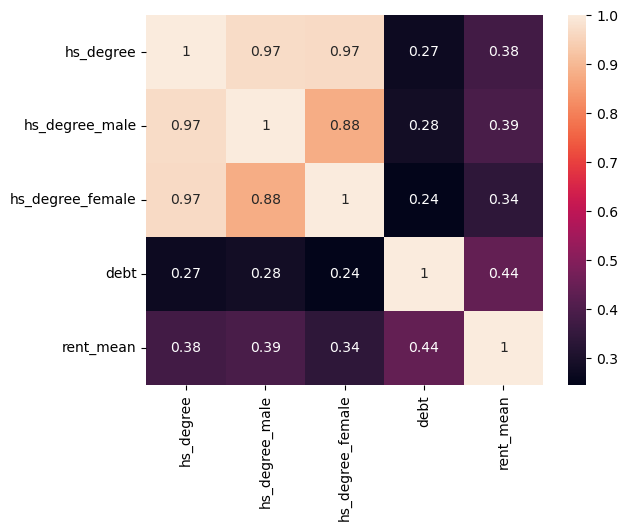

In [27]:
import matplotlib.pyplot as mp 
import seaborn as sb 
  
# import file with data 
data = df_sampled[['hs_degree', 'hs_degree_male', 'hs_degree_female', 'debt', 'rent_mean', ]]
# prints data that will be plotted 
# columns shown here are selected by corr() since 
# they are ideal for the plot 
print(data.corr()) 
  
# plotting correlation heatmap 
dataplot=sb.heatmap(data.corr(), annot=True)
  
# displaying heatmap 
mp.show() 